In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier
#KERAS
from keras.models  import Sequential, K
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop
import warnings
#Evaluation of performance metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline



df = pd.read_csv('C:\\Users\\jamie\\AppData\\Desktop\\PhD\\Datasets\\MSc-Sleep-Data\\Subject_1_and_2_Combined.csv')


df = df.drop('Date', 1)
df = df.drop('Gender', 1)
df.head(10)

,ID,Exercise,Stress,Fatigued,Sleep,Outcome
0,2,0,4.0,4.0,9.0,1
1,2,0,5.0,5.0,13.0,1
2,2,1,5.0,4.0,10.0,1
3,2,0,3.0,4.0,3.0,1
4,2,0,4.0,4.0,9.0,1
5,2,0,3.0,4.0,8.0,1
6,2,0,5.0,4.0,6.0,1
7,2,0,4.0,2.0,5.0,1
8,2,0,4.0,2.0,10.0,1
9,2,0,5.0,4.0,3.0,1


In [14]:
#RANDOM FOREST

X = df.iloc[:, :-1].values

#y-axis uses the variable outcome as its target variable
y = df["Outcome"].values

#splitt the training data using 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11111)

#shows percentage of seizures compared to non seizures
np.mean(y), np.mean(1-y)


## Train the RF Model
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(X_train, y_train)

# Make predictions on the test set - both "hard" predictions, and the scores (percent of trees voting yes)
y_pred_class_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)


#list the performance metrics the model emanates
print('\nAccuracy Score for Random Forest Model is {:.3f}'.format(accuracy_score(y_test,y_pred_class_rf)*100))
print('\nRandom Forest roc-auc measure is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_rf[:,1])))
print("\nRandom Forest  Classification Report\n")
print(classification_report(y_test,y_pred_class_rf))


#NEURAL NETWORK
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

# 1 hidden layer, 12 hidden nodes, sigmoid activation
model_1 = Sequential([
    Dense(12, input_shape=(5,), activation="relu"),
    Dense(1, activation="sigmoid")
])

print("\n************Start of Nerual Netwrok Summary*********")
model_1.summary()

# Fit(Train) the Model
model_1.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model_1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)

#  One is a hard decision, the other is a probabilitistic score.
y_pred_class_nn_1 = model_1.predict_classes(X_test_norm)
y_pred_prob_nn_1 = model_1.predict(X_test_norm)

y_pred_class_nn_1[:10]
y_pred_prob_nn_1[:10]

# Print model performance and plot the roc curve
print('\n')
print('\nAccuracy Score for Nerual Network is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)*100))
print('\nNerual Network roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_class_nn_1)))
print("\nNerual Network Classification Report\n")
print(classification_report(y_test,y_pred_class_nn_1))





Accuracy Score for Random Forest Model is 98.182

Random Forest roc-auc measure is 0.924

Random Forest  Classification Report

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       156
           1       0.88      0.78      0.82         9

    accuracy                           0.98       165
   macro avg       0.93      0.89      0.91       165
weighted avg       0.98      0.98      0.98       165


************Start of Nerual Netwrok Summary*********
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 12)                72        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 13        
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________
Train on 383 samples, validate o

383/383 [==============================] - 0s 26us/step - loss: 0.2255 - acc: 0.9217 - val_loss: 0.2005 - val_acc: 0.9455
Epoch 114/200
383/383 [==============================] - 0s 29us/step - loss: 0.2247 - acc: 0.9217 - val_loss: 0.1996 - val_acc: 0.9455
Epoch 115/200
383/383 [==============================] - 0s 29us/step - loss: 0.2238 - acc: 0.9217 - val_loss: 0.1987 - val_acc: 0.9455
Epoch 116/200
383/383 [==============================] - 0s 29us/step - loss: 0.2229 - acc: 0.9217 - val_loss: 0.1978 - val_acc: 0.9455
Epoch 117/200
383/383 [==============================] - 0s 28us/step - loss: 0.2221 - acc: 0.9217 - val_loss: 0.1970 - val_acc: 0.9455
Epoch 118/200
383/383 [==============================] - 0s 29us/step - loss: 0.2212 - acc: 0.9217 - val_loss: 0.1962 - val_acc: 0.9455
Epoch 119/200
383/383 [==============================] - 0s 31us/step - loss: 0.2204 - acc: 0.9217 - val_loss: 0.1953 - val_acc: 0.9455
Epoch 120/200
383/383 [==============================] - 0s 26


Nerual Network AUCROC is 0.949


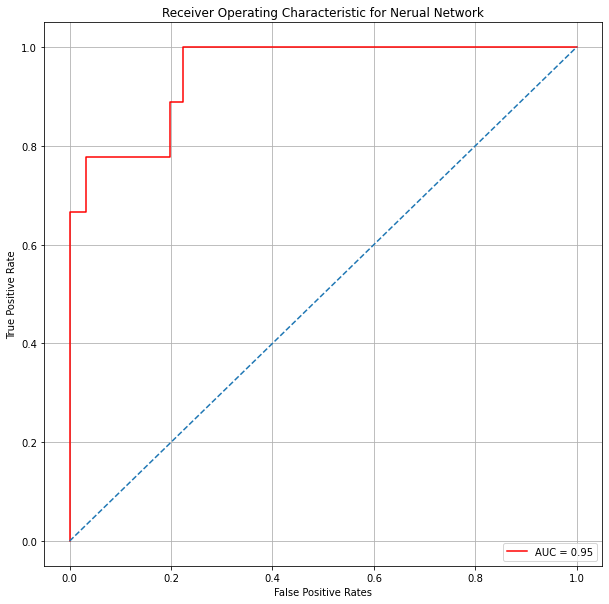

In [19]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_prob_nn_1)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic for Nerual Network')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.grid(True)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rates')
plt.savefig('nnroc.png')


print('\nNerual Network AUCROC is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))



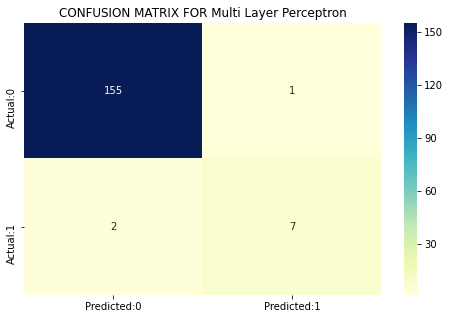

In [24]:



#create a confusion matrix to visually display the postive and negative prediction rate
cmrf=confusion_matrix(y_test,y_pred_class_rf)
conf_matrixrf=pd.DataFrame(data=cmrf,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
plt.title("CONFUSION MATRIX FOR Multi Layer Perceptron")
sns.heatmap(conf_matrixrf, annot=True,fmt='d',cmap="YlGnBu")
plt.savefig('cmrfe.png')